In [1]:
import os
import cv2 
import imghdr
from matplotlib import pyplot as plt
import tensorflow as tf

In [12]:
# Define the folder path
folder_path = r'C:\Users\IMAD\Desktop\Neural Networks\CNN\CNN multi'

In [14]:
os.listdir(folder_path) # show's the data folder

['Airplane', 'Car', 'happy', 'logs', 'sad', 'testing']

In [17]:
# Remove dodgy images¶
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(folder_path): 
    for image in os.listdir(os.path.join(folder_path, image_class)):
        image_path = os.path.join(folder_path, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image C:\Users\IMAD\Desktop\Neural Networks\CNN\CNN multi\logs\train
Issue with image C:\Users\IMAD\Desktop\Neural Networks\CNN\CNN multi\logs\validation


In [22]:
# Load Data
import numpy as np
data = tf.keras.utils.image_dataset_from_directory(folder_path)

Found 537 files belonging to 6 classes.


In [23]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next() # images represented as numpy arrays

In [24]:
batch[0].shape
batch[1] 
# Class 0 = Airplane 
# Class 1 = Car
# Class 2 = Happy PPl
# Class 3 = Sad PPl

array([2, 2, 0, 1, 4, 0, 4, 4, 2, 2, 0, 2, 0, 4, 0, 2, 4, 1, 0, 1, 2, 0,
       0, 2, 0, 4, 4, 2, 2, 2, 1, 1])

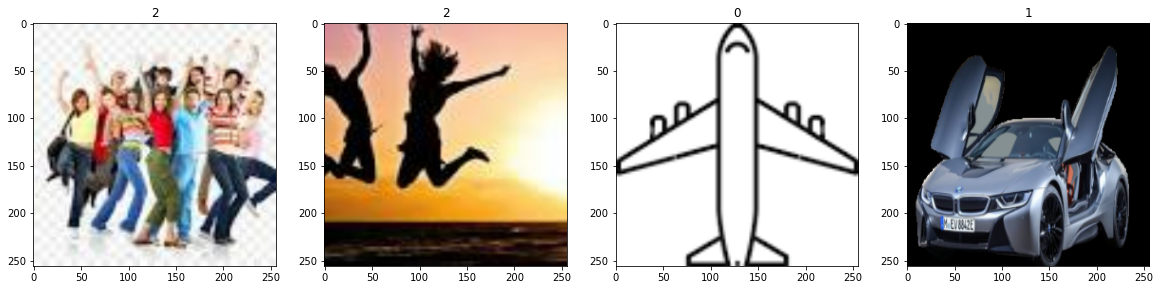

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]) 

In [26]:
# Preprocess Data
# Scale Data
data = data.map(lambda x,y: (x/255, y))
scale = data.as_numpy_iterator().next()
batch = scale

In [29]:
batch[1].max()

4

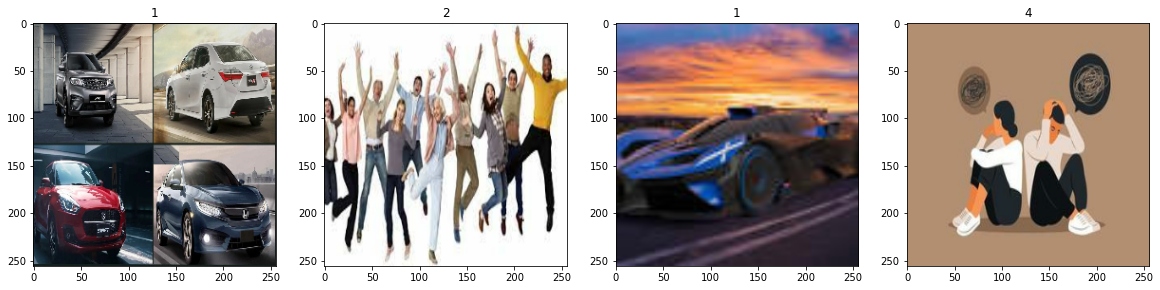

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)  # .astype(int) / black images show's
    ax[idx].title.set_text(batch[1][idx]) 

In [31]:
# Split Data
len(data)

17

In [36]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [37]:
train_size+val_size+test_size

17

In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [39]:
# Build Deep Learning Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization

In [40]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Output layer with 4 classes and softmax activation

num_classes = 4  # Assuming you have 4 classes
train_dataset = train.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
val_dataset = val.map(lambda x, y: (x, tf.one_hot(y, num_classes)))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [25]:
# Train model
logdir='D:\CNN multi\logs'     
os.listdir(logdir) # show's the data folder

[]

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(
    train_dataset,  # Your training data
    epochs=20,
    validation_data=val_dataset,  # Your validation data
    callbacks=[tensorboard_callback]
)


Epoch 1/20
11/11 [==============================] - 43s 4s/step - loss: 3.5043 - accuracy: 0.2642 - val_loss: 1.3220 - val_accuracy: 0.4766
Epoch 2/20
11/11 [==============================] - 41s 4s/step - loss: 1.2594 - accuracy: 0.4886 - val_loss: 1.1261 - val_accuracy: 0.4844
Epoch 3/20
11/11 [==============================] - 40s 3s/step - loss: 0.9713 - accuracy: 0.6364 - val_loss: 1.0088 - val_accuracy: 0.6016
Epoch 4/20
11/11 [==============================] - 41s 4s/step - loss: 0.8309 - accuracy: 0.6960 - val_loss: 0.6330 - val_accuracy: 0.8281
Epoch 5/20
11/11 [==============================] - 40s 3s/step - loss: 0.6208 - accuracy: 0.7756 - val_loss: 0.5241 - val_accuracy: 0.8125
Epoch 6/20
11/11 [==============================] - 40s 4s/step - loss: 0.5386 - accuracy: 0.8210 - val_loss: 0.4366 - val_accuracy: 0.8672
Epoch 7/20
11/11 [==============================] - 41s 4s/step - loss: 0.4239 - accuracy: 0.8580 - val_loss: 0.2983 - val_accuracy: 0.9062
Epoch 8/20
11/11 [==

* Training Loss: 0.0334 
* Training Accuracy: 99.43%
* Validation Loss: 0.0402
* Validation Accuracy: 98.44%

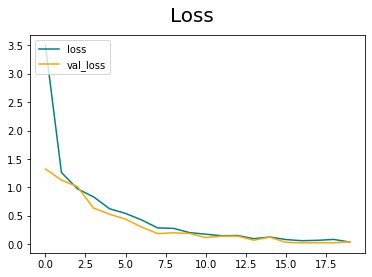

In [28]:
# Plot Performance
# loss vs val_loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

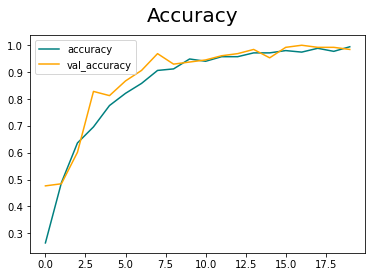

In [29]:
# accuracy vs val_accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

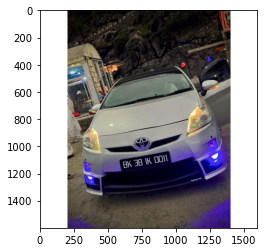

In [71]:
img = cv2.imread('D:/CNN multi/testing/car.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

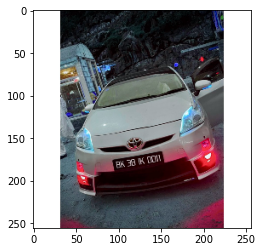

In [72]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
predict = model.predict(np.expand_dims(resize/255, 0))
predict

1/1 [==============================] - 0s 59ms/step


array([[2.02281086e-07, 9.99919891e-01, 1.08255186e-07, 7.97464891e-05]],
      dtype=float32)

In [74]:
# Get the class with the highest probability
predicted_class = np.argmax(predict, axis=1)
# Print the predicted class
print(f"Predicted class: {predicted_class}")

Predicted class: [1]
